## Supervised Machine Learning (kleine Einführung)
* Supervised Machine Learning = Lernen von Funktionen durch Beispiele.

---

### Wichtige Komponenten 
* eine Menge an Eingabe/Ausgabe-Beispielpaaren: $$(x_1,y_1),\dots,(x_s,y_s),\quad x_i \in \mathbf{R}^n, y_i \in \mathbf{R}^m,\quad \forall i=1,\dots,s.$$ 
* eine parametrisierbare Funktion ($\theta$ sind die Parameter, $x$ und $y$ die Eingabe und Ausgabe): $$f: \mathbf{R}^n \times \mathbf{R}^p \mapsto \mathbf{R}^m;\quad f(x,\theta) = y.$$
* und eine Fehlerfunktion, die bewertet, wie "gut" die Parameter $\theta$ einer Funktion $f$ sind: $$e_f: \mathbf{R}^p \mapsto \mathbf{R};\quad e_f(\theta).$$

### Grundlegende Idee
* Es soll ein Parametervektor $a$ mit Hilfe der Beispielpaare gelernt werden, der eine "Vorhersage" möglich macht: $$y_1 \approx f(x_1,\theta),\dots,y_s \approx f(x_s,\theta).$$
* Die Fehlerfunktion bewertet wie gut oder schlecht die Parameter sind, indem z.B. über die quadratische Abweichung der Vorhersage von dem eigentlichen Ergebnis summiert wird: $$e_f(\theta) = \sum_{i=1}^{s} (y_i - f(x_i,\theta))^2.$$
* Ein optimaler Parametervektor wird gefunden, indem die Fehlerfunktion minimiert wird: $$\arg\min_{\theta\in\mathbf{R}^p} e_f(\theta).$$

### Einführendes Beispiel

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# define the "real" function and generate a set of samples
def f_real(x):
    return 2*x**2 + x - 1 + np.random.normal(0,2,size=samplecount)

samplecount = 50 # more samples -> usually better approximation
xs_sample = np.linspace(-5,5,samplecount) # generate input values 
ys_sample = f_real(xs_sample) # and corresponding output values
samples = list(zip(xs_sample, ys_sample))

* Gegeben ist eine Folge an Paaren von (fehlerbehafteten) Ein- und Ausgaben `xs_sample` und `ys_sample`.
* In diesem Fall werden die Ausgaben durch eine einfache quadratische Funktion `f_real` generiert: $$f^*(x) = 2x^2 + x - 1.$$
* In den meisten Fällen ist die "echte" Funktion nicht bekannt (oder nur schwer zu berechnen).

In [2]:
# define some possible predictors
def f1(x,a):
    # this one is just a linear function
    return x*a[0] + a[1]

def f2(x,a):
    # this one is quadratic
    return x**2*a[0] + x*a[1] + a[2]

# define a possible error-function
def e(a):
    # this one sums over the squared error
    global samples, f
    return sum([(y-f(x,a))**2 for x,y in samples])

* $f^*$ kann durch verschiedene Modelle approximiert werden: bspw. durch eine lineare Funktion $$f_1(x,\theta) = \theta_1 x + \theta_2$$ oder durch eine quadratische Funktion $$f_2(x,\theta) = \theta_1 x^2 + \theta_2 x + \theta_3.$$
* Die Fehlerfunktion $e$ summiert dabei den quadrierten Fehler zwischen Vorhersage ($f(x_i,\theta)$) und Messung ($y_i$).

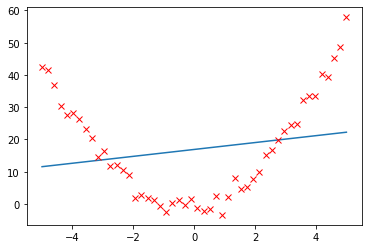

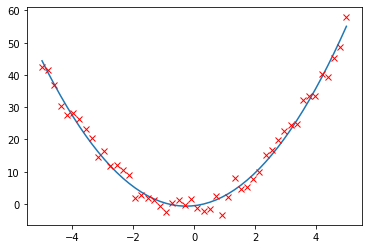

In [3]:
# derive optimal parameter vector by minimizing the error function
# we use a squared error function (e1) together w/ the linear predictor function (f1)
theta0 = (1,1) # initial parameter vector (can be arbitrary)
f = f1
theta_optimal = minimize(e, theta0).x # calculate optimal parameter vector. "minimize" is a function from scipy.
plt.plot(xs_sample, f(xs_sample, theta_optimal)) # plot function w/ optimal parameters
plt.plot(xs_sample,ys_sample,"rx")
plt.show()

# but one could also use a quadratic predictor function f2 (obviously better):
theta0 = (1,1,1)
f = f2
theta_optimal = minimize(e, theta0).x
plt.plot(xs_sample, f(xs_sample, theta_optimal))
plt.plot(xs_sample,ys_sample,"rx")
plt.show()

* `minimize` ist eine Funktion von scikit-learn, die das minimieren von nichtlinearen Funktionen unterstützt. I.d.R. wird dazu das Gradienten- oder Newtonverfahren verwendet.
* Wir können den Plots entnehmen, dass unterschiedliche Modelle unterschiedlich gut approximieren können. Eine lineare Regression macht in diesem Fall bspw. weniger Sinn als eine quadratische.
* Auch die Wahl der Fehlerfunktion spielt eine Rolle: so sind quadratische Fehlerfunktionen z.B. anfälliger für "Outlier" als absolute.

---
## Künstliche Neuronale Netzwerke (KNN)
* Welches Modell repräsentiert die Daten am besten? Wie kann das Modell so generisch wie möglich gewählt werden und trotzdem "gut" abschneiden?
* Idee: viele Parameter + stark nichtlineare Funktionen, die viel Freiraum für vielfältige Approximierung lassen.
* Die einfachste Form eines KNN (ein vollständig vernetztes Netzwerk, aka Fully-Connected-Network) besteht aus 
    * Mindestens einem *Layer*; einer Kombination aus einer nichtlinearen "Aktivierungsfunktion" und einer Linearkombination der Eingabedaten $$v_{i+1} = g_i(A_i v_i + b_i),\quad v_0 = x,\quad y = v_n$$
    * Layer können beliebig gestaffelt werden (siehe Bild für Beispiel).
    * Das erste und letzte Layer werden Input- bzw. Output-Layer genannt und korrespondieren mit den Ein- bzw. Ausgabedaten.
![bild](./pics/knn_simple.jpg?s=10)